<a href="https://colab.research.google.com/github/amFarrouk/Lawnchair/blob/alpha/FusionModel(VGG16%2BInceptV3)_whurs_SAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import zipfile
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!wget https://doc-08-8s-docs.googleusercontent.com/docs/securesc/78sd4ofia6ilotkrk7b0jldtpiipsguk/i69g6lef4t465jmm1s12ks60dls6iap0/1648246800000/06583234309955973519/06583234309955973519/1NXjzQcE_rmmoZZ0PgUi62oRIgvuK-YVy?e=download&ax=ACxEAsZcpTXMsN1TvbxLuR1bu5kS2sr9PinWowrlidm-hqrmNTVRTF8ZVFGam5nqTVeV1Yx08vanLNIVrfyFOeKpkKmyNlJyjm7mRAhEjwPvSRfWJBZ4TRqhiyP_y3YoiOedAukMaTN-WkSVpTGDlZeeUUslXf4myB277BHUitV3W47Qq_5H-yZD3g-X234BedDg0WL4NNU-sqjStlQwZMajVLbo-ZfQz51WKYHc2l2vva07bGvUMoo5Y0kI0V8MJXZrYOSmx7WkuVh-KW8SGPLbXAIxI4l4ubE6Gm0t6RvoQap3p1gA89EDCvNziat8a3epxVujrwldmsSzgm5TN64xzDBR-RkofBVmCmeisL2COThvjlB2oMbP7jvuUJaXKJ9P8Podc-SUsvXmrdl9baULqmqTUi_V2Oq_FiCk20KioZxZ2Pua4Lfw58o5Wf6BPxWRqU5df_idDDzhXMfvWJJV0jmmABRDymd7Rlnb4ydQ1YfTpNH-JZIDUT005ThPLwduUVJVG9J5wn1nwkzifjYNju3S8W1ooqrCkO1Ezz5msSzsddgLMZktcxYUtaMD2Rx_Vp9jdAWo7tUDuwyYByGezCc31rv2oClRBQnISoXyL28gNOX5tIAGDY3LZQo7_tDNTo_EmLQGgiyO7Pz5FQztdQe3w7CyVE7EDnpLR9v12y_Dnp-3Udj2YqH1I4LaE3f8_f8ChaB84H8-rHjBCtkBbDa2fJ9yzR6MwnJuyCvEpf1EFs_2eO-D7Zs1RSo65Aaw_dCdvVGdrwdT2ooY7khPG1PlMsGNTZd7lGPV0neWHIvClKUfx6tLm9M&authuser=2 -O ./UCMerced_LandUse.zip
!mkdir WHURS19/
!unzip -qq ./drive/MyDrive/MemoireM2/Scripts/WHU-RS19.zip -d ./WHURS19
#!rm ./UCMerc.zip

In [4]:
img1=cv2.imread("./WHURS19/Desert_01.jpg",cv2.IMREAD_COLOR)
img2=cv2.imread("./WHURS19/Farmland-06.jpg",cv2.IMREAD_COLOR)
img3=cv2.imread("./WHURS19/Mountain_01.jpg",cv2.IMREAD_COLOR)
img4=cv2.imread("./WHURS19/Park_41.jpg",cv2.IMREAD_COLOR)

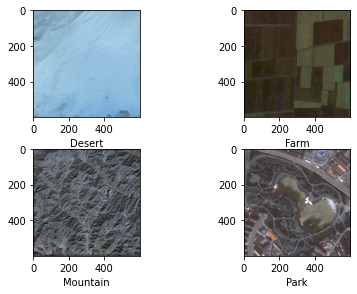

In [5]:
fig, axarr = plt.subplots(2,2)
fig.tight_layout()

axarr[0,0].imshow(img1)
axarr[0,0].set_xlabel("Desert")
axarr[0,1].imshow(img2)
axarr[0,1].set_xlabel("Farm")
axarr[1,0].imshow(img3)
axarr[1,0].set_xlabel("Mountain")
axarr[1,1].imshow(img4)
axarr[1,1].set_xlabel("Park")
pass

In [6]:
def load_images_names_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename is not None:
            images.append(filename)
    return images

In [7]:
def split_lambda(x):
  if "_" in x:
    return x.split("_")[0]
  elif "-" in x:
    return x.split("-")[0]

In [8]:
whurs_list=load_images_names_from_folder("./WHURS19")

In [9]:
whurs_series=pd.Series(whurs_list)
whurs_df=pd.DataFrame(whurs_series,columns=["img"])
whurs_df=whurs_df.sort_values("img")

whurs_df["label"]=whurs_df["img"].apply(lambda x : split_lambda(x))

In [10]:
whurs_df.to_csv("whurs19.csv",header=False,index=False)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
all_x,all_y=whurs_df["img"],whurs_df["label"]

xtrain,xtest,ytrain,ytest=train_test_split(all_x,all_y,train_size=0.7,random_state=1,shuffle=True,stratify=all_y)

train_df=pd.DataFrame(xtrain,columns=["img"])
train_df["label"]=ytrain

print("train_data:")
train_df.head()

train_data:


,img,label
427,airport_22.jpg,airport
344,beach-08.jpg,beach
588,forest_53.jpg,forest
63,railwayStation_35.jpg,railwayStation
16,forest_32.jpg,forest


In [13]:
test_df=pd.DataFrame(xtest,columns=["img"])
test_df["label"]=ytest

print("test_data:")
test_df.head()

test_data:


,img,label
217,viaduct_09.jpg,viaduct
299,Farmland-35.jpg,Farmland
770,pond_33.jpg,pond
421,meadow_47.jpg,meadow
551,Desert_26.jpg,Desert


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_image_gen=ImageDataGenerator(rescale=1/255.0)
test_image_gen=ImageDataGenerator(rescale=1/255.0)

In [16]:
train_image_gened=train_image_gen.flow_from_dataframe(train_df,x_col="img",y_col="label",
                                            directory="./WHURS19",
                                            batch_size=32,
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            class_mode='sparse')

Found 703 validated image filenames belonging to 19 classes.


In [17]:
test_image_gened=test_image_gen.flow_from_dataframe(test_df,x_col="img",y_col="label",
                                            directory="./WHURS19",
                                            batch_size=32,
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            class_mode='sparse',
                                            shuffle=False)

Found 302 validated image filenames belonging to 19 classes.


In [18]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [19]:
import tensorflow.keras.models as models
from tensorflow.keras.layers import Flatten,Dense,Dropout,Concatenate,Input

In [20]:
pretrained_VGG16= tf.keras.applications.VGG16(include_top=False,weights='imagenet',classes=19,input_shape=(256,256,3))
for layer in pretrained_VGG16.layers[:-4]:
        layer.trainable=False

for layer in pretrained_VGG16.layers:
  print(layer.name,"is trainable : ",layer.trainable)
#pretrained_VGG16.summary()

58900480/58889256 [==============================] - 1s 0us/step
input_1 is trainable :  False
block1_conv1 is trainable :  False
block1_conv2 is trainable :  False
block1_pool is trainable :  False
block2_conv1 is trainable :  False
block2_conv2 is trainable :  False
block2_pool is trainable :  False
block3_conv1 is trainable :  False
block3_conv2 is trainable :  False
block3_conv3 is trainable :  False
block3_pool is trainable :  False
block4_conv1 is trainable :  False
block4_conv2 is trainable :  False
block4_conv3 is trainable :  False
block4_pool is trainable :  False
block5_conv1 is trainable :  True
block5_conv2 is trainable :  True
block5_conv3 is trainable :  True
block5_pool is trainable :  True


In [21]:
pretrained_InceptV3= tf.keras.applications.InceptionV3(include_top=False,weights='imagenet',classes=19,input_shape=(256,256,3))
for layer in pretrained_InceptV3.layers[:-32]:
        layer.trainable=False

for layer in pretrained_InceptV3.layers:
  print(layer.name,"is trainable : ",layer.trainable)
#pretrained_InceptV3.summary()

87924736/87910968 [==============================] - 1s 0us/step
input_2 is trainable :  False
conv2d is trainable :  False
batch_normalization is trainable :  False
activation is trainable :  False
conv2d_1 is trainable :  False
batch_normalization_1 is trainable :  False
activation_1 is trainable :  False
conv2d_2 is trainable :  False
batch_normalization_2 is trainable :  False
activation_2 is trainable :  False
max_pooling2d is trainable :  False
conv2d_3 is trainable :  False
batch_normalization_3 is trainable :  False
activation_3 is trainable :  False
conv2d_4 is trainable :  False
batch_normalization_4 is trainable :  False
activation_4 is trainable :  False
max_pooling2d_1 is trainable :  False
conv2d_8 is trainable :  False
batch_normalization_8 is trainable :  False
activation_8 is trainable :  False
conv2d_6 is trainable :  False
conv2d_9 is trainable :  False
batch_normalization_6 is trainable :  False
batch_normalization_9 is trainable :  False
activation_6 is trainable :

In [57]:
#building costum model
input_img=Input(shape=(256,256,3))
#input_img= tf.keras.layers.Conv2D(filters=3,kernel_size=(1,1))(input_img)

pretrained_InceptV3= tf.keras.applications.InceptionV3(include_top=False,weights='imagenet',classes=19,input_tensor=input_img)
for layer in pretrained_InceptV3.layers[:-32]:
        layer.trainable=False
#pretrained_InceptV3(input_img)

pretrained_VGG16= tf.keras.applications.VGG16(include_top=False,weights='imagenet',classes=19,input_tensor=input_img)
for layer in pretrained_VGG16.layers[:-4]:
        layer.trainable=False
#pretrained_VGG16(input_img)

x1 = Flatten()(pretrained_VGG16.output)
x1 = Dense(64, activation=tf.keras.activations.elu)(x1)
x2 = Flatten()(pretrained_InceptV3.output)
x2 = Dense(64, activation=tf.keras.activations.elu)(x2)
conx = Concatenate(axis=1)([x1,x2])
x = Dense(128, activation=tf.keras.activations.elu)(conx)
x = Dropout(0.5)(x)
x = Dense(128, activation=tf.keras.activations.elu)(x)
x = Dropout(0.5)(x)
predictions = Dense(19, activation=tf.keras.activations.softmax)(x)

model=tf.keras.models.Model(inputs=input_img, outputs=predictions)
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_944 (Conv2D)            (None, 127, 127, 32  864         ['input_28[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_940 (Batch  (None, 127, 127, 32  96         ['conv2d_944[0][0]']             
 Normalization)                 )                                                          

In [58]:
#Loss and Optimizer
loss=tf.keras.losses.sparse_categorical_crossentropy
optim=tf.keras.optimizers.Adamax(learning_rate=1e-4)
#CallBacks
#earlyStopCall=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5)
lrCall = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
#model compilation
model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

#_=tf.keras.utils.plot_model(
#    model, to_file='./FusionModel_whurs_SAT.png', show_shapes=True, show_layer_names=False)
#model.summary()

In [45]:
#def format_gen_outputs(gen1,gen2):
#    x1 = gen1[0]
#    x2 = gen2[0]
#    y1 = gen1[1]
#    return [x1, x2], y1

In [46]:
#train_combo_gened=(format_gen_outputs,train_image_gened,train_image_gened)
#test_combo_gened=(format_gen_outputs,test_image_gened,test_image_gened)

In [59]:
#defining best learing rate
history=model.fit(train_image_gened,epochs=10,steps_per_epoch=21,validation_data=test_image_gened,callbacks=[lrCall])

Epoch 1/10
21/21 [==============================] - 35s 1s/step - loss: 3.2584 - accuracy: 0.1177 - val_loss: 2.0131 - val_accuracy: 0.5563 - lr: 1.0000e-04
Epoch 2/10
21/21 [==============================] - 18s 833ms/step - loss: 2.1071 - accuracy: 0.3711 - val_loss: 1.2891 - val_accuracy: 0.8013 - lr: 1.1220e-04
Epoch 3/10
21/21 [==============================] - 17s 835ms/step - loss: 1.4713 - accuracy: 0.5544 - val_loss: 0.9714 - val_accuracy: 0.8576 - lr: 1.2589e-04
Epoch 4/10
21/21 [==============================] - 17s 834ms/step - loss: 1.1680 - accuracy: 0.6453 - val_loss: 0.6813 - val_accuracy: 0.9238 - lr: 1.4125e-04
Epoch 5/10
21/21 [==============================] - 18s 836ms/step - loss: 1.0072 - accuracy: 0.7064 - val_loss: 0.5292 - val_accuracy: 0.9603 - lr: 1.5849e-04
Epoch 6/10
21/21 [==============================] - 18s 836ms/step - loss: 0.7555 - accuracy: 0.7854 - val_loss: 0.3987 - val_accuracy: 0.9636 - lr: 1.7783e-04
Epoch 7/10
21/21 [=========================

(0.0001, 0.0003, 0.0, 3.0)

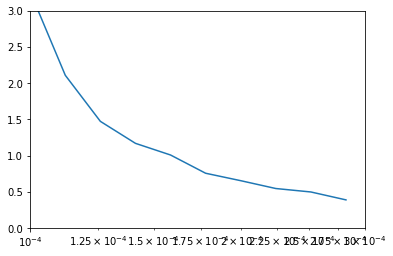

In [60]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-4, 3e-4, 0, 3])

In [61]:
#Loss and Optimizer
loss=tf.keras.losses.sparse_categorical_crossentropy
optim=tf.keras.optimizers.Adamax(learning_rate=2.8184e-04)
#CallBacks
earlyStopCall=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5)

bestStopCall=tf.keras.callbacks.ModelCheckpoint(filepath=r"./checkpoint", monitor='val_accuracy',
                                                verbose=1,
                                                save_weights_only=True,
                                                mode='max',
                                                save_best_only=True)
#lrCall = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
#model compilation
model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

_=tf.keras.utils.plot_model(
    model, to_file='./FusionModel_whurs_SAT.png', show_shapes=True, show_layer_names=False,
)
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_944 (Conv2D)            (None, 127, 127, 32  864         ['input_28[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_940 (Batch  (None, 127, 127, 32  96         ['conv2d_944[0][0]']             
 Normalization)                 )                                                          

In [62]:
history=model.fit(train_image_gened,epochs=50,steps_per_epoch=21,validation_data=test_image_gened,callbacks=[earlyStopCall,bestStopCall])

Epoch 1/50
21/21 [==============================] - ETA: 0s - loss: 1.1210 - accuracy: 0.6662
Epoch 1: val_accuracy improved from -inf to 0.94040, saving model to ./checkpoint
21/21 [==============================] - 27s 1s/step - loss: 1.1210 - accuracy: 0.6662 - val_loss: 0.3562 - val_accuracy: 0.9404
Epoch 2/50
21/21 [==============================] - ETA: 0s - loss: 0.6574 - accuracy: 0.7988
Epoch 2: val_accuracy improved from 0.94040 to 0.94371, saving model to ./checkpoint
21/21 [==============================] - 19s 895ms/step - loss: 0.6574 - accuracy: 0.7988 - val_loss: 0.2595 - val_accuracy: 0.9437
Epoch 3/50
21/21 [==============================] - ETA: 0s - loss: 0.4322 - accuracy: 0.8584
Epoch 3: val_accuracy improved from 0.94371 to 0.95695, saving model to ./checkpoint
21/21 [==============================] - 19s 892ms/step - loss: 0.4322 - accuracy: 0.8584 - val_loss: 0.1572 - val_accuracy: 0.9570
Epoch 4/50
21/21 [==============================] - ETA: 0s - loss: 0.389

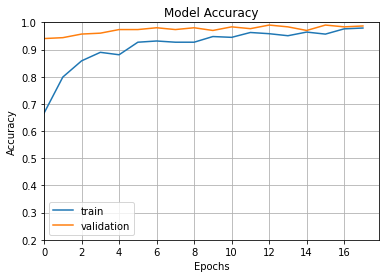

In [63]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.2,ymax=1,xmin=0)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

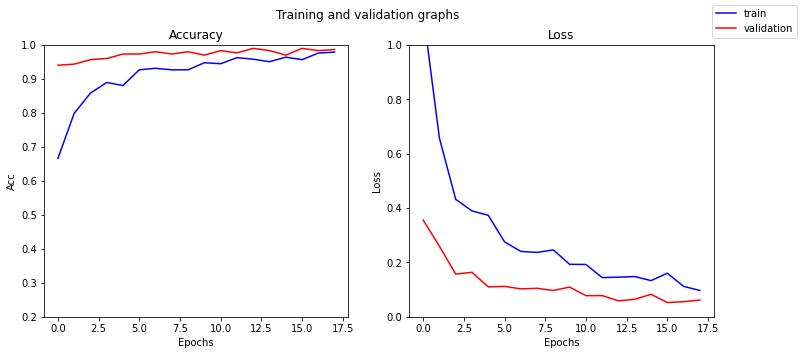

In [80]:
#----------------------------------------------------------------
# Plot training and validation accuracy per epoch for both models
#----------------------------------------------------------------
fig, (axs1, axs2) = plt.subplots(1, 2,figsize=(12,5),sharey=False)
fig.suptitle('Training and validation graphs')
#plt.axis(ymin=0.2,ymax=1,xmin=0)
axs1.set_title('Accuracy')
axs1.axis(ymin=0.2,ymax=1)
axs1.set(xlabel="Epochs",ylabel="Acc")
axs1.plot(history.epoch, history.history['accuracy'],'b',label="train")
axs1.plot(history.epoch, history.history['val_accuracy'],'r',label="validation")

axs2.set_title('Loss')
axs2.axis(ymin=0,ymax=1)
axs2.set(xlabel="Epochs",ylabel="Loss")
axs2.plot(history.epoch, history.history['loss'],'b')
axs2.plot(history.epoch, history.history['val_loss'],'r')

fig.legend(loc="upper right")
plt.savefig("FusionModel(VGG16+InceptV3)_whurs.png")
plt.show()

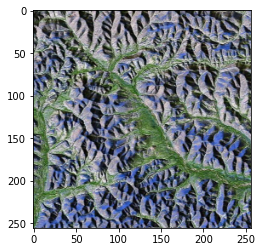

img_batch shape (1, 256, 256, 3)


2

In [64]:
"""
722	footballField_24.jpg	footballField
435	pond_01.jpg	pond
494	Desert_48.jpg	Desert
414	Desert_24.jpg	Desert
280	residential_38.jpg	residential
293	beach-14.jpg	beach
37	airport_11.jpg	airport
257	forest_28.jpg	forest
227	airport_50.jpg	airport
882	river_32.jpg	river
125	river_24.jpg	river
794	meadow_52.jpg	meadow
251	Mountain_18.jpg	Mountain
265	Mountain_21.jpg	Mountain
729	forest_24.jpg	forest
562	commercial_49.jpg	commercial
896	port_38.jpg	port
"""

img_path="./WHURS19/Mountain_21.jpg"
img = cv2.imread(img_path,cv2.IMREAD_COLOR)
img= cv2.resize(img,(256,256))
img=img/255.0

plt.imshow(img)
plt.show()

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print("img_batch shape",img_batch.shape)

prediction = model.predict(img_batch)
np.argmax(prediction,axis=1)[0]

In [65]:
test_image_gened.class_indices

{'Desert': 0,
 'Farmland': 1,
 'Mountain': 2,
 'Park': 3,
 'airport': 4,
 'beach': 5,
 'bridge': 6,
 'commercial': 7,
 'footballField': 8,
 'forest': 9,
 'industrial': 10,
 'meadow': 11,
 'parking': 12,
 'pond': 13,
 'port': 14,
 'railwayStation': 15,
 'residential': 16,
 'river': 17,
 'viaduct': 18}

In [66]:
predictions=np.argmax(model.predict(test_image_gened),axis=1)
labels=test_df["label"].apply(lambda x : test_image_gened.class_indices[x])
labels=labels.values.tolist()

In [67]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='pred')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 19)), labels=classes,rotation = 90)
    plt.yticks(list(range(0, 19)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

In [68]:
classes=[str(key) for key in test_image_gened.class_indices]

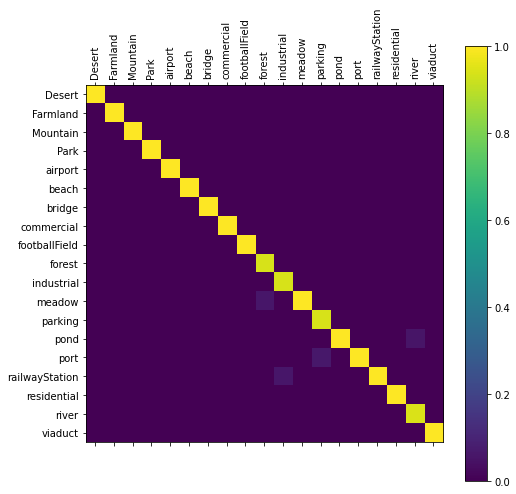

In [69]:
show_confusion_matrix(labels, predictions, list(classes))